In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#importer les fichier csv
output_data_processed = pd.read_csv("/content/Exercice2_sensor_raw.csv")
output_data_raw = pd.read_csv("/content/Exercice2_sensor_raw.csv")

output_data_processed

,Target(Class),GyroX,GyroY,GyroZ,AccX,AccY,AccZ
0,1,-0.923664,3.694656,0.824427,0.162598,-0.086670,-0.969482
1,1,-0.908397,4.534351,0.832061,0.175781,-0.100586,-1.013184
2,1,0.786260,3.969466,0.587786,0.322754,-0.140381,-0.911621
3,1,0.335878,4.564885,-0.251908,0.480225,-0.226807,-0.936768
4,1,3.351145,2.694656,-0.106870,0.426025,-0.253906,-0.950195
...,...,...,...,...,...,...,...
1109,4,-1.961832,2.358779,8.893130,0.472900,-0.431152,-0.873535
1110,4,-0.435115,5.396947,1.282443,0.459961,-0.227051,-0.967041
1111,4,-1.061069,4.534351,1.183206,0.419189,-0.192871,-1.002686
1112,4,-1.015267,5.259542,0.656489,0.308838,-0.090088,-1.023193


In [ ]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

# Importer les fichiers CSV
output_data_processed = pd.read_csv("/content/Exercice2_sensor_raw.csv")

# Extraire les classes uniques
classes = output_data_processed["Target(Class)"].unique()

# number of subprocesses to use for data loading
num_workers = 0



# Calculer la matrice de corrélation pour chaque classe
for classe in classes:
    # Filtrer les données pour chaque classe
    data_classe = output_data_processed[output_data_processed["Target(Class)"] == classe]
    variables = ["GyroX", "GyroY", "GyroZ", "AccX", "AccY", "AccZ"]
    data_classe = data_classe[variables]

    # Calculer la matrice de corrélation
    correlation_matrix = output_data_processed.corr()
    #print(f"Correlation matrix for class {classe} (training data):\n", correlation_matrix)

    # Vous pouvez décommenter ces lignes pour afficher la matrice de corrélation
    # plt.figure(figsize=(8,6))
    # sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    # plt.title(f"Matrice de corrélation pour la classe {classe}")
    # plt.show()

# Définir les variables indépendantes (X) et la variable dépendante (y)
x = output_data_processed.iloc[:, 1:]
y = output_data_processed["Target(Class)"].values - 1

# Séparer les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#changer en tensor.torch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

#creation des dataloader pour pytorch
train_dataset = TensorDataset(X_train_tensor,y_train_tensor)
test_dataset = TensorDataset(X_test_tensor,y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=10,shuffle= True)
test_loader = DataLoader(test_dataset, batch_size=10,shuffle= True)
print(X_train)
print(y_train)
print(X_test_tensor)
print(y_test_tensor)

[[ 1.38818058 -1.75796387 -3.26667484 -2.03435387 -2.8285342  -1.72634825]
 [-0.84950093  0.94482839  0.24825092  0.64886866 -0.2518858  -0.65295584]
 [ 0.42114234  0.02192372 -0.04590334  1.41684394 -0.80339228  0.68320701]
 ...
 [-0.35023933  0.33269774 -0.05398792 -1.17792071  0.78282131 -0.57114995]
 [ 0.11303946  0.60815653 -0.02102772  2.10306269 -1.32707046  0.30640413]
 [-0.06687463 -0.59491563 -0.07699788 -0.07219713  0.2351096   0.88896122]]
[1 1 3 3 2 2 2 2 1 1 0 0 3 1 3 0 1 2 3 0 1 1 1 1 1 1 3 3 1 1 2 2 2 3 2 1 0
 1 0 0 0 3 0 0 1 2 0 2 1 1 1 1 2 1 3 2 1 2 1 2 2 1 0 2 0 3 1 3 1 1 3 1 0 2
 1 0 1 2 1 1 1 1 1 1 2 2 2 0 2 2 3 1 2 3 0 0 0 1 1 3 1 2 2 2 2 3 2 0 1 3 2
 1 2 1 1 0 0 2 3 1 1 2 3 0 2 2 0 0 1 0 2 1 0 1 3 1 0 0 3 0 3 2 2 2 2 1 2 1
 3 0 1 2 0 0 2 2 1 1 2 0 1 2 1 2 0 3 0 3 1 2 0 2 3 0 3 1 3 0 1 0 2 1 0 1 1
 2 2 2 0 2 0 2 0 3 2 0 3 2 1 3 0 3 3 0 2 1 1 3 0 3 0 2 1 2 0 1 2 2 3 1 2 2
 3 2 3 3 2 3 2 3 1 2 3 2 0 0 3 2 0 3 0 0 1 3 2 2 1 0 2 0 2 1 2 1 1 2 2 3 3
 3 3 0 1 1 1 1 3 1 

In [ ]:
# import libraries
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

#Creation du modele
## TODO: Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(6, 512)
        self.fc2 = nn.Linear(512, 224)
        self.fc3 = nn.Linear(224, 112)
        self.fc4 = nn.Linear(112, 60)



    def forward(self, x):
        # flatten image input
        x = x.view(-1, 6)
        # Première couche Relu
        x = F.relu(self.fc1(x))
        #m = nn.Dropout(p=0.2)
        #output = m(x)
        # Deuxième couche ReLu
        x = F.relu(self.fc2(x))
        # add hidden layer, with relu activation function
        x = F.relu(self.fc3(x))
        # Quatrième couche leaky ReLu
        x = F.relu(self.fc4(x))



        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=6, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=224, bias=True)
  (fc3): Linear(in_features=224, out_features=112, bias=True)
  (fc4): Linear(in_features=112, out_features=60, bias=True)
)


In [ ]:
## TODO: Specify loss and optimization functions
import torch.optim as optim

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# number of epochs to train the model
n_epochs = 300  # suggest training between 20-50 epochs

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0

    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)

    # print training statistics
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        train_loss
        ))

Epoch: 1 	Training Loss: 1.576405
Epoch: 2 	Training Loss: 1.006148
Epoch: 3 	Training Loss: 0.893469
Epoch: 4 	Training Loss: 0.847361
Epoch: 5 	Training Loss: 0.830747
Epoch: 6 	Training Loss: 0.792741
Epoch: 7 	Training Loss: 0.762932
Epoch: 8 	Training Loss: 0.764454
Epoch: 9 	Training Loss: 0.739159
Epoch: 10 	Training Loss: 0.698409
Epoch: 11 	Training Loss: 0.693622
Epoch: 12 	Training Loss: 0.669615
Epoch: 13 	Training Loss: 0.688860
Epoch: 14 	Training Loss: 0.644919
Epoch: 15 	Training Loss: 0.639631
Epoch: 16 	Training Loss: 0.645205
Epoch: 17 	Training Loss: 0.643818
Epoch: 18 	Training Loss: 0.592903
Epoch: 19 	Training Loss: 0.584867
Epoch: 20 	Training Loss: 0.556118
Epoch: 21 	Training Loss: 0.548495
Epoch: 22 	Training Loss: 0.545332
Epoch: 23 	Training Loss: 0.555899
Epoch: 24 	Training Loss: 0.527294
Epoch: 25 	Training Loss: 0.522176
Epoch: 26 	Training Loss: 0.527602
Epoch: 27 	Training Loss: 0.493066
Epoch: 28 	Training Loss: 0.482935
Epoch: 29 	Training Loss: 0.4

In [ ]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class 32 = batchsize
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(4):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            class_correct[i], class_total[i]))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 5.054336

Test Accuracy of     0: 38% (20/52)
Test Accuracy of     1: 62% (37/59)
Test Accuracy of     2: 50% (35/69)
Test Accuracy of     3: 69% (30/43)

Test Accuracy (Overall): 54% (122/223)


In [ ]:
import torch
from sklearn.metrics import confusion_matrix
import numpy as np

# Mettre le modèle en mode évaluation
model.eval()

# Listes pour stocker les vraies étiquettes et les prédictions
all_targets = []
all_predictions = []

# Désactiver le calcul des gradients pour plus de vitesse
for data, target in test_loader:
      # Faire des prédictions
      output = model(data)
      _, predicted = torch.max(output, 1)

      # Stocker les vraies étiquettes et les prédictions
      all_targets.extend(target.numpy())
      all_predictions.extend(predicted.numpy())

# Convertir les listes en tableaux numpy
all_targets = np.array(all_targets)
all_predictions = np.array(all_predictions)

# Créer la matrice de confusion
conf_matrix = confusion_matrix(all_targets, all_predictions)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[23 11 15  3]
 [ 9 37 10  3]
 [10 17 39  3]
 [ 5  5  1 32]]


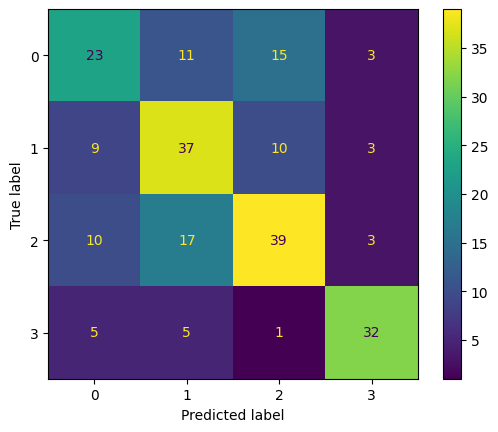

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()